In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
# importing the breast_cancer dataset from sklearn.datasets library
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [30]:
df2 = pd.DataFrame(data['data'], columns=list(data['feature_names']))
df2['Label'] = data['target']
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
X = df2.drop('Label', axis=1)
y = df2.loc[:, 'Label']

In [33]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X) # Since PCA is highly sensitive & data needs to be scaled

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X_scaled)

pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [34]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, y).transform(X)

lda.explained_variance_ratio_

array([1.])

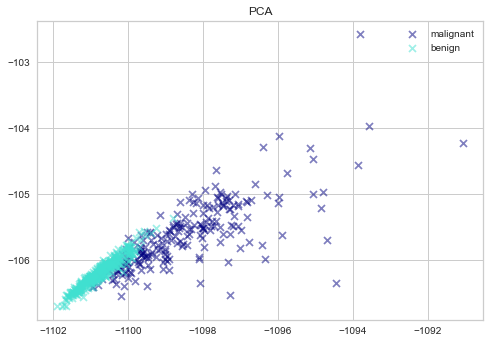

In [35]:
plt.figure()
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], data.target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.5, marker='x', label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA")

plt.show()


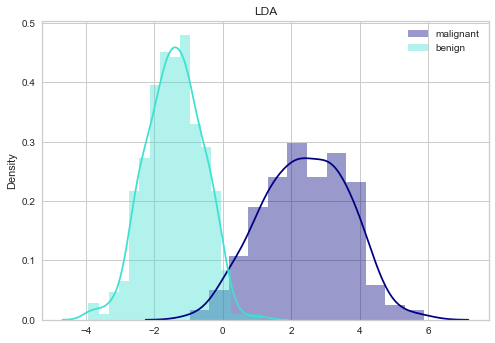

In [36]:
colors = ["navy", "turquoise"]

for color, i, target_name in zip(colors, [0, 1], data.target_names):
    sns.distplot(X_lda[y == i, 0], color=color, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()


#### Segregation power: 
LDA with 1 component has a greater segregation power than PCA with 2 components.

#### Explanation of variance:

PCA: [0.98204467, 0.01617649]; Sum =~ 0.9982

LDA: [1.]

This means that the 2 components of PCA together can explain about 99.8% of variance while the one component of LDA can explain about 100% of the variance.

#### Working of PCA & LDA

PCA is an unsupervised dimensionality reduction algorithm. It's based on the concepts of eigen values & eigen vectors. It reduces the feature set into a linearly independent set of features (not subset), called the principal components. The first component will have maximum variance explainability, the second lesser, and so on.

LDA is a supervised dimensionality reduction algorithm. It preserves as much class-wise information as possible while reducing the dimensionality of the data. It finds centroids based on the class and aims to maximize the distance between the class centroids and minimise the variation within each of them.

LDA is said to perform better on large datasets with multiple classes since this separability is relevant in LDA. PCA works better when each of the classes have fewer number of samples.

In [37]:
df2.Label.value_counts()

1    357
0    212
Name: Label, dtype: int64

Since both our classes have considerable number of samples and since the variance explainability of LDA is better (though slightly) than PCA's, I think LDA (1 component) is better for the dataset than the PDA (2 components).